In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apps_df = pd.read_csv('app_category.csv')
reviews_df = pd.read_csv('user_review.csv')

In [3]:
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')
filtered_apps = apps_df[apps_df['Reviews'] > 1000]
top5_categories = filtered_apps['Category'].value_counts().nlargest(5).index.tolist()
filtered_apps = filtered_apps[filtered_apps['Category'].isin(top5_categories)]
merged_df = pd.merge(reviews_df, filtered_apps[['App', 'Rating', 'Category']], on='App', how='inner')

In [4]:
def rating_group(rating):
    if rating <= 2:
        return '1-2 Stars'
    elif rating <= 4:
        return '3-4 Stars'
    else:
        return '4-5 Stars'

merged_df['Rating Group'] = merged_df['Rating'].apply(rating_group)

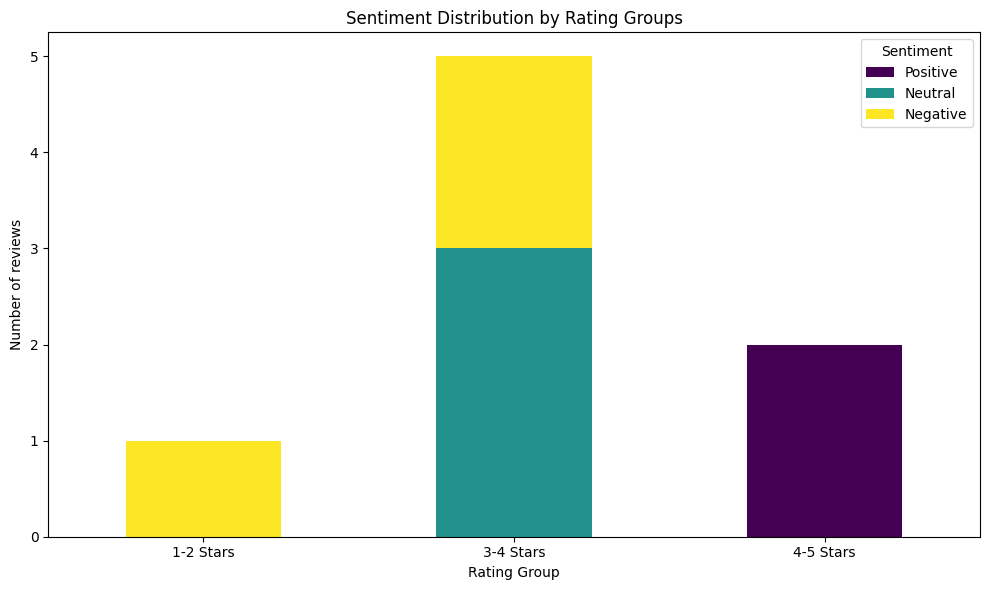

In [5]:
sentiment_counts = merged_df.groupby(['Rating Group', 'Sentiment']).size().unstack().fillna(0)
sentiment_counts = sentiment_counts[['Positive', 'Neutral', 'Negative']] 
sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))
plt.title('Sentiment Distribution by Rating Groups')
plt.ylabel('Number of reviews')
plt.xlabel('Rating Group')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()